# <span style="color:blue"> pandas DataFrames
AWS CLOUD INSTITUTE: PROVIDED FOR EDUCATIONAL INSTRUCTIONAL PURPOSES ONLY.

## Import libraries
These are libraries will will need for this example.
- **panda DataFrames**, imported as ***pd***
- **Numpy**, imported as ***np***
- **Matplotlib** for graphic visualizations as ***plt***
- **json** module to manipulate JSON files

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

## pandas documentation
**pandas** has a **wide number of functions available**, and we will **make use of a number of them** in this notebook. Please refer to the [pandas web site](https://pandas.pydata.org/) for all of the details. 

Whenever possible, when I use a function **I'll try to include hyperlinks to** the **official documentation** for it.

## Matplotlib documentation
We will be **using Matplotlib for visualization**, specifically the pyplot library. Please **refer to the [Matplotlib pyplot tutorial](https://matplotlib.org/stable/tutorials/pyplot.html)** for complete details. Whenever possible, when I use a function I'll try to include hyperlinks to the official documentation for it. Note that in many cases you **may not see Matplitlib called directly**, **because pandas** has plotting features that will **use Matplotlib internally**.

# Analyzing Tucker Quest Game Data
**Earlier in this class**, we **looked at** the instructional **"Tucker Quest" text based game** for examples of object-oriented programming, and data structures. We will now **use panda DataFrames to analyze game data**. This is only meant as an example. Given the **limitted amount of sample data**, and the relative simplicity of the game, we're **not going to make any astounding discoveries**. **However** the **process and** the usage of the **tools** would be **similar for a real scenario**. There are a lot of people who make a living out of analyzing data for popular games.

## Recapping the Tucker Quest Game
We'll quickly **recap** some of the **main concepts in the game to understand the meaning of the data** what we'll be analyzing. This **section can be collapsed/hidden** if the recap is not needed.

### Users and Players
**Users** in the game can **create** multiple **"player characters"** **used to play the game**. There are **two types** of characters, **knights and wizards**. Both character types will play the game generally the same way, but have different types of attacks and defenses. 

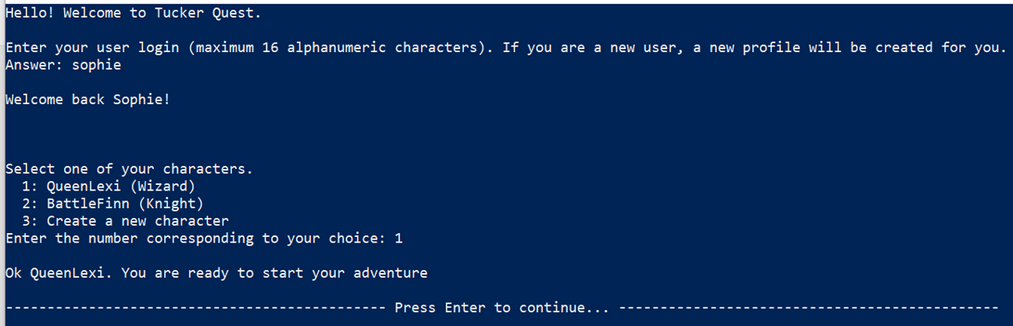

### Game board and movement
The **game** is **played across** multiple **areas**, which are **represented by two-dimensional grids**. The player moves across the areas by **selecting simple up/down/left/right movement controls**. They visualize their progress in a text-based map, as seen in examples below. Different **game elements** are **visualized** in the area map **using ASC-II and unicode characters**. The board remains hidden to the player, until they move to an adjacent cell. In the examples below, you can see some of the elements found in the board:
- The **player**, represented with the **symbol Ÿ**, which is the only which will move to different positions
- **Enemies**, represented with the **symbol Ӝ**.
- **Items** which the **players collect** as they move through the game. There are **multiple types of items**, but for the purpose of our analysis, **we will be looking** at **items used to attack and deffend** during battles.
- Players can also collect items by completing quests

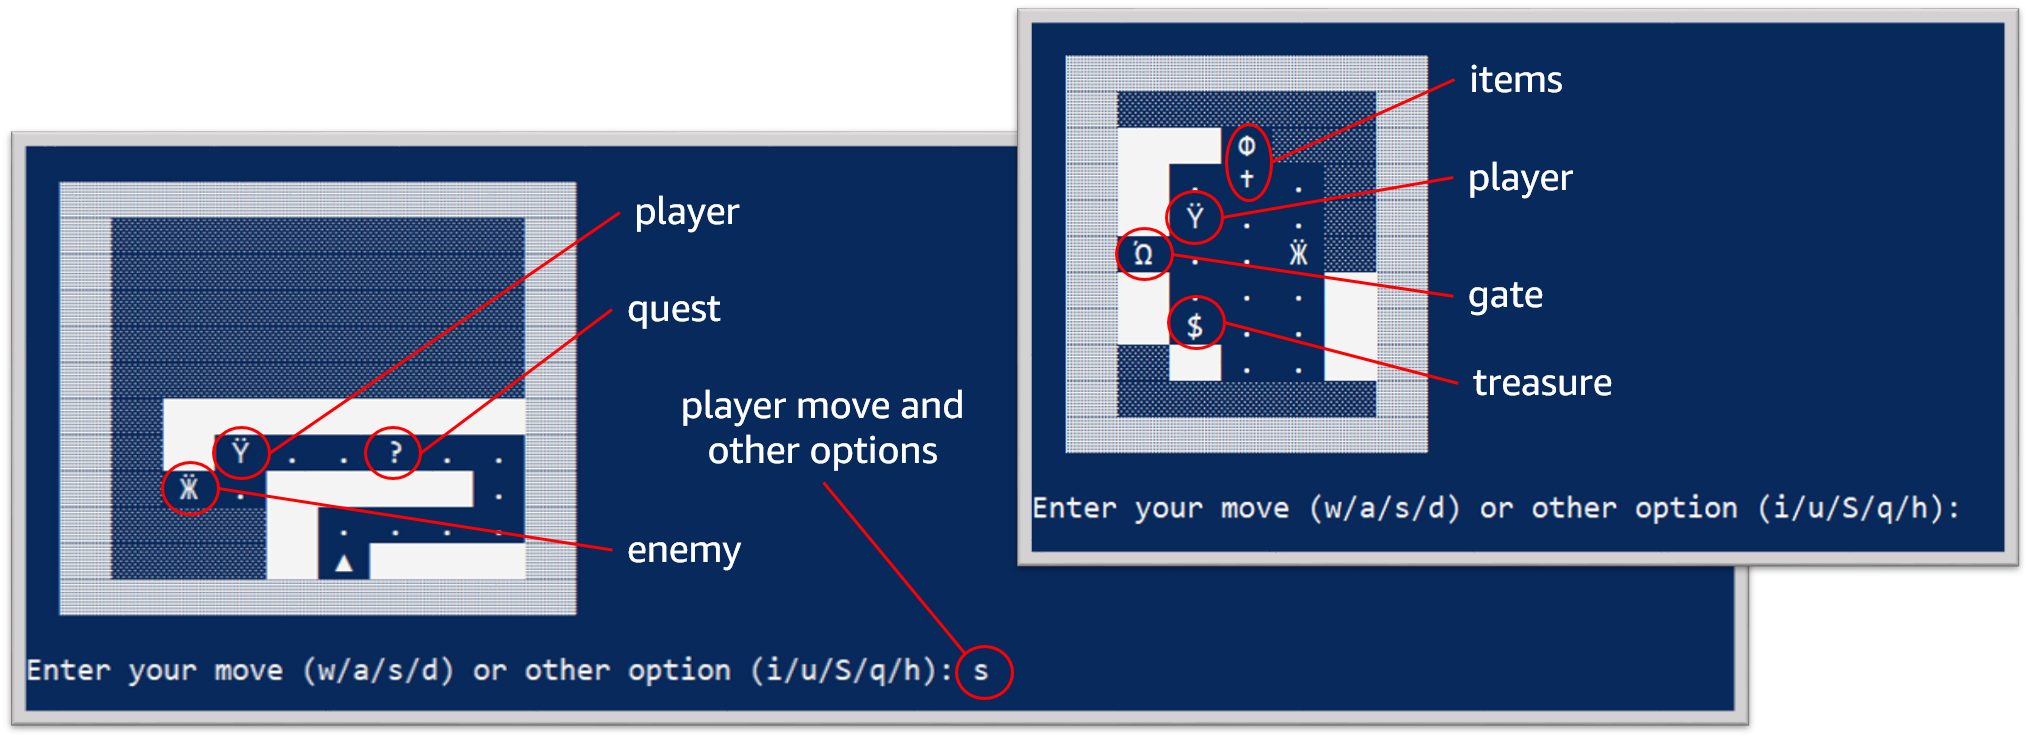

### Game Battles
**Battles start when** a **player approaches** a **cell adjacent to** an **enemy**.

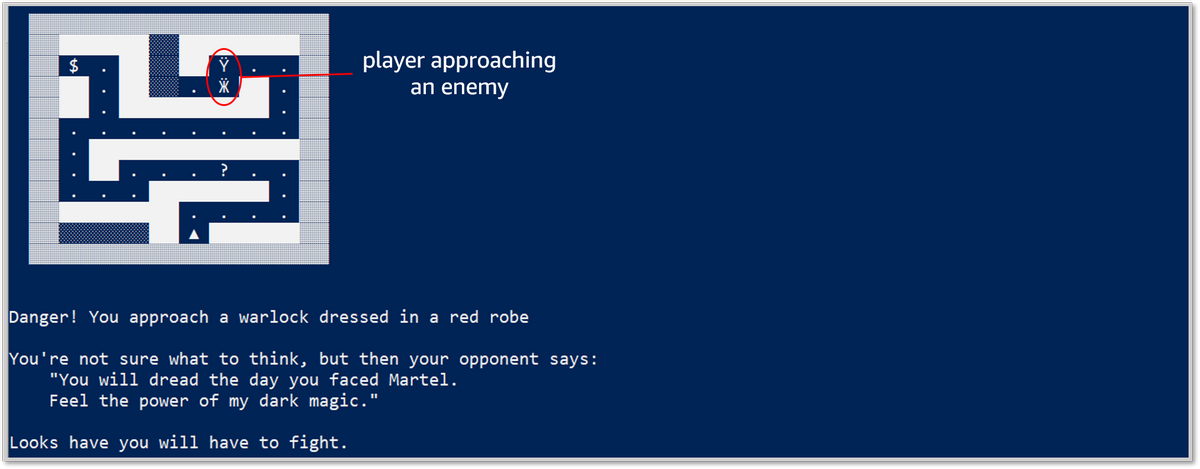

Then **players an enemies take turns attacking each other**, **until** on one of them has **no more health**. The **attack and defense power** will **depending on** the **item** being yielded.

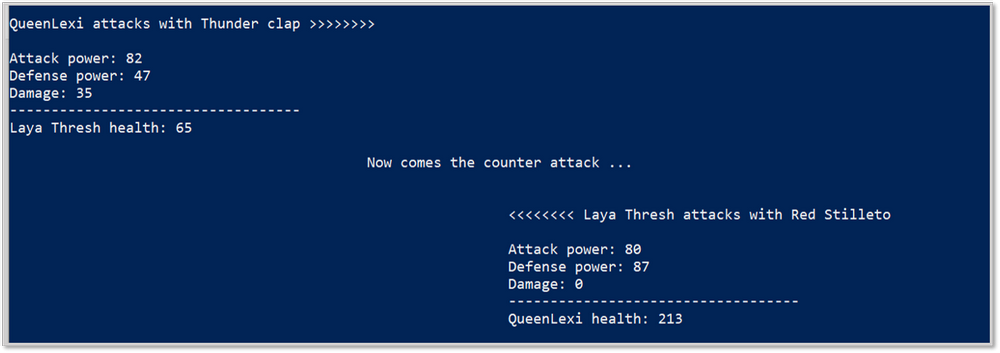

### Game Score
The **game ends when** the **player reaches** the **end cell** (which in the game lore, means finding the Temple of Lonarra). The **player** is **awarded** a **score** based on a **weighted combination** of **enemies defeated, quests completed, items collected, and rooms visited**.

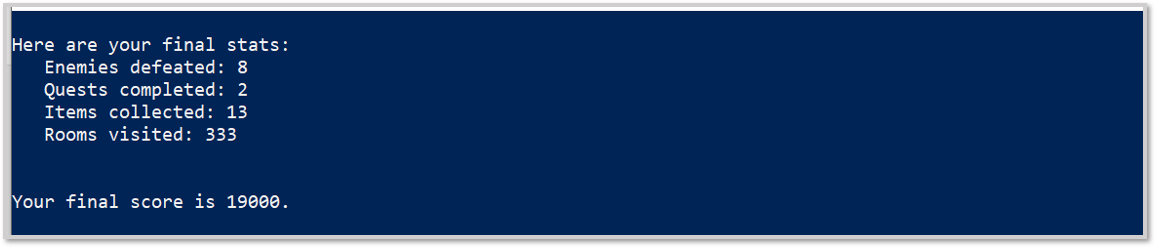

## Game Data
The **Tucker Quest game** is highly **data driven**. All the **elements of the game**, **such as player information, items, non-player characters, area maps, and many others** are **stored** in JSON **data files**. The games also **logs information** about all the overall **game results**, **and** the individual **battles between players and enemies**.

We will be looking at subset of these files for our analysis. In the normal Tucker Quest game installation these **files are in the "data" folder**. They were **copied from** the **game execution environment, into the "data" folder under this notebook**, so you can open them to visualize their formats. The **files being used are**:
- **scores.json** - The **scores for all the games played**, along with the key data used to determine the scores.
- **items.json** - The **definition of** all the **items in the game**.
- **player_characters.json** - The **definition of** all the **player characters** in the game.
- **npcs.json** - The **definition of** all the **non-player characters** in the game. This includes the enemies, which is something we will be looking at.
- **battle_stats.csv** - The **full log** of **every attack and defense in** game **battles**.

## Creating pandas DataFrames from data files
**pandas has functions** that allow you to **create DataFrames directly from data files**, including JSON and CSV formats, which we'll use here. The functions we will be using are:
- **[read_json](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html#)** - **Creates** a **DataFrame from** a **JSON formatted file**. Click on the link for the full documentation. In addition to the file name, a **key parameter is *orient=\<value\>***, which **specifies how** that d**ata is structured in** the **JSON file**.
- **[read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas-read-csv)** - **Creates** a **DataFrame from** a **CSV file**. Click on the link for the full documentation.

# Analysing Player Scores
We are going to **start by analyzing** the **overall game scores**. For instance, we **might be looking for patterns** on **things that contribute to** a **higher score**.

## Load Game Scores
As mentioned earlier, **all** the **game scores** are **stored in** the ***scores.json*** data file. As we'll see, **there isn't a lot of detail in just that file**, so we'll need to **complemented it** to come up with some meaningful observations.

### Read scores file into a panda DataFrame

In [ ]:
# file name (the "\" works on windows, but might be different in other OSs)
score_file = r"data\scores.json"

In [ ]:
sdf = pd.read_json(score_file, orient='index')

### Get information on the DataFrame
We can **get information about the DataFrame** examining multiple pandas atributes:
- ***ndim*** - The **number of dimensions** (axes) of the DataFrame.
- ***shape*** - A tuple representing the structure of the DataFrame as **(# of rows, # of columns)**
- ***size*** - **total number of elements** in the DataFrame.

In [ ]:
print(f"Number of dimensions: {sdf.ndim}")
print(f"Dataframe shape: {sdf.shape}")
print(f"Total elements: {sdf.size}")

### Inspect DataFrame data
pandas DataFrames can be **printed with a regular *print* statement**.

In [ ]:
print(sdf)

This is not bad, but **doesn't** quite **look like** the 2-dimensional **tabular format** we described **pandas DataFrames are**.

The **good news** is that you **get** a much **nicer look in the notebook** if you just **evaluate the DataFrame variable**.

In [ ]:
sdf

**If** you **want more control** of **how many rows to output**, you can **use** the **[head function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)**. **By default**, *head()* gives me the **first 5 rows of data**, but you can pass in an argument with a different number.

In [ ]:
sdf.head()

### Fix index
The **index when** we **imported was set to the dates**, but we **can reset** it to have the **usual 0 through n numbers**, using the **[reset_index function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html#pandas.DataFrame.reset_index)**. The *drop=True* parameters prevents the old index to be kept as a separate column.

In [ ]:
sdf = sdf.reset_index(drop=True)

In [ ]:
sdf.head()

Ok, that looks nicer.

### Examine the data frame data types

Good to **check** if all the **data types were imported as I expected**. For instance, I want to check that numbers are really numbers and not strings, and see if my date field is represented as a date type. I can check that using the ***dtypes*** attribute.

In [ ]:
sdf.dtypes

Ok, that looks fine.

## Adding Player Data
**We have** information about the **player scores, but** we have **no details about** the **player characters** other than their id. **If we want** to come up with any **conclusions regarding which types of players get higher scores**, we need to **get** that **information from the player** character **data file**.

### Read Player Character file into a panda DataFrame
As mentioned earlier, **all** the **player chracter definitions** are **stored in** the ***player_characters.json*** data file. We'll read it and inspect the data as we did before.

In [ ]:
# file name (the "\" works on windows, but might be different in other OSs)
player_file = r"data\player_characters.json"

In [ ]:
pdf = pd.read_json(player_file, orient='index')

### Get information on the DataFrame

In [ ]:
print(f"Dataframe shape: {sdf.shape}")

### Inspect DataFrame data

In [ ]:
pdf.head()

There is a lot **more information** here **than we need, and** we have that **funny index again**.

#### Fix the index
Like we did earlier, let's **reset the index** to the normal numeric order.

In [ ]:
pdf = pdf.reset_index(drop=True)
pdf.head()

### Create a simple map of player id to player type
**Player types** in the game **can be 1 (Knight) or 2 (Wizard)**. These are defined in a game configuration file, which we are not including here.

We can **create** a **small DataFrame** by **selecting specific columns** from the original DataFrame. 

In [ ]:
ptot = pdf[['id', 'type']]
ptot

## Enrich orginal score data frame
Now we can **complement** our original **score DataFrame (*sdf*)** **with** the **player type**. Let's quickly recap what my score DataFrame looked like so I don't have to scroll up.

In [ ]:
sdf.head()

### Merge original score frame to player type map
**pandas DataFrames can be merged**, using the **[merge function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html#pandas.merge)**. You can click the link for the full documentation, but essentially you need to **specify which columns in the two DataFrames** should be **used to correlate data**.

**In this case**, the ***id* column in** the **ptot DataFrame represents** the **player id**, so it will be **used to merge with** the ***player_id* column** in the **original *sdf*** scores **DataFrame**.

In [ ]:
sdf = sdf.merge(ptot, how='left', left_on='player_id', right_on='id')
sdf.head()

If we **scroll** to the **right**, we can **see** the **player type column** was **added**.

### Drop extra id column
**When we merged** the **DataFrames** we **ended up** with **both** the ***player_id* column** **from** the **scores DataFrame**, **and** the ***id* column from ptot DataFrame**. They represent the **same data**, so we can **use** the **[drop function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html#pandas.DataFrame.drop)**, specifying the column we want to drop.

In [ ]:
sdf = sdf.drop(columns=['id'])
sdf.head()

### Analyze the data
We can do a very **quick basic analysis** of our score data **using** the **[describe function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe)**.

In [ ]:
sdf.describe()

#### Observations
One thing that **seems strange** is that the **standard deviation** (the ***std* value**) **for** the **score** is **very high**. The value of approximately 7350 even approaches the mean value of 9870. This is an unusually high deviation. **If** you **want a refresher** on what **standard variation** means, and why this is a high value, you can **look at the OPTIONAL section** of this Notebook.

So **why** do we have **such high variation** in scores?

### Sort the data by scores
Let's **sort** the **data by scores**, so we can **look at patterns between the low and high scores**. We can **use** the **[sort_values function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values)**, and **specify *score*** as the **column to sort by**.

The **function** will **return** a **sorted DataFrame**. By default, **most pandas function** do **not update** the DataFrames **in place**. We **could assign** that **to another variable**, then **use** the **head method to print the top 5 and last 5 items**. **However** the Jupyter **Notebook already shows that** as the output of the sort **by default**.

In [ ]:
sdf.sort_values(by=['score'])

#### Observations
**Can we detect any patterns** on the first 5 rows with the lowest scores, and the last 5 rows with the highest?

Yes, if we **look at** the ***game_result* column**, we see that **all** the **low scores** have a **game_result** value of **1**, **and** the **high scores** have a **game_result of 2**. As **per** the our **game definition**, a game result of **1 indicates an incomplete game**, where the **player quit** before the game was over. A game result of **2 indicates a complete game**, where the player made it all the way till the end. Therefore it's **not surprising** that **games where the player** might have **quit very early on**, would have a **substantially lower** score that was played through the end.

### Filter data to include only complete games
To have more consistent data, **we will look** at **just** the **games** that were **played till the end**. **pandas has a number of different functions** that **support filtering** of rows and columns, **including** **[loc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc)**, **[filter](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.filter.html#pandas.DataFrame.filter)** and **[query](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html#pandas.DataFrame.query)**.

**Another simple way to filter** is to **include** a **condition inside the brackets** as seen below.

In [ ]:
# filter the DataFrames to include only completed scores of games
csdf = sdf[sdf["game_result"] == 2]

# evaluate the complete DataFrame
csdf

#### How did that work?
**If** you're **curious** as to **how** that **statement worked**, you can **expand** the following **hidden cells** for a breakdown.

##### Breaking down the statement
The full statement is:
```
csdf = sdf[sdf["game_result"] == 2]
```
To see how that works, let's **evaluate just the expression in the middle** with the comparison

In [ ]:
sdf["game_result"] == 2

So as we can see, **when we do** that **comparison, we are creating a pandas series with results *True* or *False* for each row** in the original DataFrame, **depending on whether the row satisfies the condition**. We **can even assign that to a filter variable** of we want.

In [ ]:
# create series that stores the result of the condition
is_game_complete_filter = sdf["game_result"] == 2

So essentially **we filtered** the ***sdf* DataFrame** **using** this **series of *True* or *False* values**. Only the **rows with** a **corresponding *True* value are maintained**. 

In [ ]:
sdf[is_game_complete_filter]

Ok, back to our regular programming ...

### Quick plotting to help with analysis
Let's do some plotting to help with out analysys/

### Scatter Plot
A **scatter plot** is a **good way** to **visualize** the **relationship between two values**. It will plot **one dot for each combination of x and y** value.

**pandas has** a **builtin [scatter function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html)** to print a scatter plot. **By default**, it will **use Matplotlib** to plot the graph.

#### Visualizing the relationship between enemies defeated and the score
Let's see if there is a relationship between how many enemies a player defeats in the course of the game, and the final score.

In [ ]:
csdf.plot.scatter(x = 'enemies_defeated', y = 'score')

Not surprisingly, we **can see** that there is a **relationship** between the **number of enemies defeated**, **and** the final **score**. **This is not a line graph**, **but** you **can envision** drawing a **line** through the middle of each cluster of points **going up**.

#### Matplotlib version
As I mentioned earlier, the **scatter function in pandas** is **implemented using Matplotlib**, which is also **the case with most** of the **plotting functions we'll see** next. Just **to confirm** that, we can **see the same diagram being plotted using Matplotlib** (**recall that** in the beginning **we imported matplotlib as "plt"**).

In [ ]:
plt.title("Enemies Defeated and Score")
plt.xlabel("Enemies Defeated")
plt.ylabel("Score")
plt.scatter(csdf.enemies_defeated, csdf.score)
plt.show()

**Using Matplotlib directly** will generally **provide more advanced options**, which can be very useful. **For our simple examples** here, we **will mostly** use the **versions baked into pandas**. 

### Histogram
A **histogram** allows you to **visualize** the **distribution of data**.

**pandas has** a builtin **[hist function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html)** to create a histogram. Again, by default, it will use Matplotlib to plot the graph.

#### Visualizing the distribution of enemies defeated values
**Since** we determined that the number of **enemies defeated** is an **important factor**, perhaps we want to **examine** the **distribution** of how many enemies are defeated.

In [ ]:
csdf.plot.hist(column='enemies_defeated')

What does that tell us? We can see that the **most common number of enemies defeated when a game is completed is 7**. 

### Which character type had better scores?
Finally we take a quick look at the original question we had, of which character type had a better average score. For this, we will **use** the **[groupby function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)**, which allows us to **group rows by a specified column value**. So ***groupby(by="type")*** will **split the data into groups** that have the **same *type* value**. ***groupby* alone doesn't produce a result** (try it out!). But you can **apply operations to** that **resulting group**, such as max, min, count, mean, and others. **We'll use mean** in this case, because that will give us the **average values within that group**.

Since I'm **looking specifically for** the **average score**, I **select** just the **"score" column** from that.

In [ ]:
csdf.groupby(by="type").mean(numeric_only=True)["score"]

**Any conclusions?** As a reminder, we mentioned earlier that a **type 1 is a Knight**, and **type 2 is a Wizard**. Looks like **in this sampling Wizards did slightly better**.

**That being said ...**

**Sample size** is an **important** factor **in data analysis**. After filtering, we **only had 64 complete results** to look at. So with this **small sample**, I would say **variation is small** enough that I **wouldn't conclusively say one type is better than the other**.

# Analysing Game Battles
We will now **turn our attention to analysing the game battles**. This will involve more players and more enemies, and it has a bigger data set, so we will get to exercise our pandas skills a bit more. 

I showed this earlier, but now that we're looking at battles, let's **recap** the the **key points in a battle**:
- **Players an enemies take turns attacking each other**, **until** on one of them has **no more health**.
- **For each attack** (by pleayer or enemy), the **attacker will generate an attack power**, and the **defender will generate a defense power**.
- The **attack and defense power** will **depending on** the **item** being yielded.

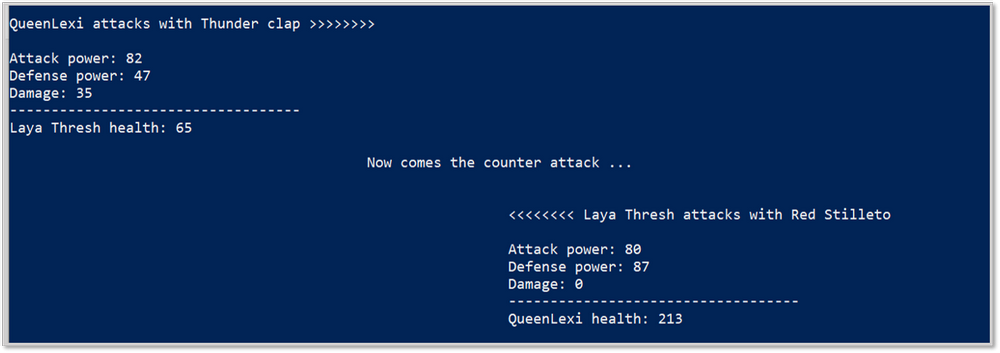

## Reading Battle Stats File
Earlier we read a JSON file into a pandas DataFrame, and now we'll **read a CSV (comma separated values) file**, **using** the **[read_csv function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas-read-csv)**.

The **Tucker Quest** game **logs every single battle action** in the game. Remember that in the game, **each battle** is a **succession of a player attack, then an enemy attack**, until either the player or enemy have no health points left. The **application code** handling the battle (the *BattleScene* class) will **log** an **individual line for each attack**. So it's not a log of each completed battle, but a log of each individual attack.

In [ ]:
# file name (the "\" works on windows, but might be different in other OSs)
battle_stats_file = r"data\battle_stats.csv"

### Read scores file into a panda DataFrame

The battle stats file is under the logs folder in the root tucker-quest installation. The sample below is from my local machine. Replace this with the location whereever you are running it.

In [ ]:
bdf = pd.read_csv(battle_stats_file)

### Get information on the DataFrame

In [ ]:
print(f"Dataframe shape: {bdf.shape}")
print(f"Total elements: {bdf.size}")

### Inspect DataFrame data

In [ ]:
bdf.head()

Hum ... our **CSV file didn't have** a **heading**, so our **DataFrame** just **used** the **first row values as headers**. We can do better.

### Add column headers
**We can define our own headers** to a pandas DataFrame. If you were to examine the code and documentation for the game's *BattleScene* class, you would be able to identify the meaning of each column. For now, you can take my word for it :-) 

The **following information is recorded for each attack**:
- **session id** - Id for the game session where the battle is taking place
- **npc id** - **Id for the non-player character** (the enemy) involved in the battle
- **player id** - **Id for the player character** involved in the battle
- **attacker** - An **indicator of who is attacking** in this log entry (player or enemy)
- **attack item** - **Id for** the **attack item used**
- **attack power** - **Attack power** generated in the attack
- **defense item** - **Id for** the **item used to defend**
- **defense power** - **Defense power** generated for the defense
- **damage** - **overall damage** generate by this attack

We'll **add** appropriate **headings** for each by **setting** the ***columns* attribute**.

In [ ]:
bdf.columns = ['session_id', 'npc_id', 'player_id','attacker', 'attack_item','attack_power', 'defense_item','defense_power', 'damage']

In [ ]:
bdf.head()

That looks a lot nicer. However, similar to what we had with the scores, **we lack details on the players, enemies and items used**. **But** we **have** their **ids**, so we'll be able to **use that** to **gather additional information**.

## Reading Item Definitions

### Read Items Definition file into a panda DataFrame
As mentioned earlier, **all** the **item definitions** are **stored in** the ***items.json*** data file. We'll read it and inspect the data as we did before.

In [ ]:
# file name (the "\" works on windows, but might be different in other OSs)
item_file = r"data\items.json"

In [ ]:
idf = pd.read_json(item_file, orient='index')

### Get information on the DataFrame

In [ ]:
print(f"Dataframe shape: {idf.shape}")

### Inspect DataFrame data

In [ ]:
idf.head()

### Fix index
Like we did earlier, let's **reset the index** to the normal numeric order.

In [ ]:
idf = idf.reset_index(drop=True)

# list the first 15 items
idf.head(15)

### Filter out things that are not attack or defense items
**If** we **look at the data** above, we can see **some items** like "Scarab broach", "Ruby ring", and others not listed in the top 15 **which do not look like attack or defense items**. Althought they are a part of the game, and used in different scenarios, they are **not relevant for our analysis of battles, so** we can **filter them out**.

We **can filter** them out **based on** the **item type**, **but** a **simpler way** is to **look for items that do not have a minimum or maximum power**. Minimum and maximum **power only applies to attack and defense items**.

The **[dropna function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)** allows to **drop rows with missing values**. **Missing values** are the ones **seen as "NaN" in the output**. The **function can drop rows with any missing value, or** you can **specify specific columns to consider**. In our case, we will specify the *min_power* (*max_power* would have worked as well).

In [ ]:
idf = idf.dropna(subset=['min_power'])

### Keep only columns we need
**There are** a lot of **columns in** the **item definition** which are **important for the game, but not relevant to battles**. Let's **clean our data** some more, and **keep only the columns** that are **relevant to our analysis**. Although the min_power and max_power are related to battles, I don't plan to use them later, so I'll drop them as well. In **this scenario**, our **analysi**s in **will focus** primarily on the **type of item** being used.

In [ ]:
idf = idf[['id', 'name', 'type']]
idf.head(15)

Looking good. **We'll come back to them later** ...

## Reading NPC Definitions

### Read NPC Definition file into a panda DataFrame
As mentioned earlier, **all** the **non-player character definitions** are **stored in** the ***npcs.json*** data file. We'll read it and inspect the data as we did before.

In [ ]:
# file name (the "\" works on windows, but might be different in other OSs)
npc_file = r"data\npcs.json"

In [ ]:
ndf = pd.read_json(npc_file, orient='index')

### Get information on the DataFrame

In [ ]:
print(f"Dataframe shape: {ndf.shape}")

### Inspect DataFrame data
Based on the shape, looks like we only have 12 NPCs in the game right now, so we can list them all.

In [ ]:
ndf

### Filter out things that are not enemies
**Not all NPCs are enemies**. **Some NPCs have different purpose in the game**, either simply advancing the story line, or providing quests. We will **filter out the DataFrame to only include enemies**, based on the NPC type as defined in the game configuration files (not included here).

In [ ]:
# these are the NPC types for enemies
enemy_types = [1, 2, 3, 4, 300]

The following **expression will keep only** the **rows where** the **type** value **is in the enemy_types list**. It **uses** the **[isin function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html)**. We may want to use the broader list of NPCs later, so we'll **use** a **new variable**, **edf**, **specifically** as the **enemies data frame**.

In [ ]:
edf = ndf[ndf['type'].isin(enemy_types)]
edf

### Fix index

In [ ]:
edf = edf.reset_index(drop=True)

### Keep only the columns we need
As we've done in other cases, we'll keep only the columns that are relevant to battles.

In [ ]:
edf = edf[['id', 'name', 'type', 'max_health']]
edf.head(12)

#### Doing it all in one line ...
**I am breaking down step by step** because it makes it **easier to understand the process**. **But remember** I mentioned earlier that **most pandas functions** will not update the DataFrame in place, and will generally **return a new DataFrame as an output**. That **makes it simple** to **"chain" multiple commands**.

Just **for illustration**, see how we **could have processed** the **last few steps** on that NPC DataFrame in **one line**.

In [ ]:
enemy_types = [1, 2, 3, 4, 300]
edf2 = ndf[ndf['type'].isin(enemy_types)].reset_index(drop=True)[['id', 'name', 'type', 'max_health']]
edf2.head(12)

**What's the better style?**
Like many things in programming, it becomes a **balance of personal preference, readability and efficiency**.

## Enrich Battle Stats DataFrames
**Now** that we **have the item and enemies data ready**, we can use it to **enrich** our **original battle statistics DataFrame (*bdf*)**.

### Recap the battle stats data
Let's **refresh our memory** with a **random subset of elements** from the battle stats DataFrames (*bdf*). We can **use** the **pandas [sample function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html#pandas.DataFrame.sample)**, which **returns randomly selected rows** from a DataFrame.

In [ ]:
bdf.sample(10)

If we **look at the "attacker" column**, we'll *see there is a **mix of attacks from players and NPC enemies**. Remember, our battle log had every indovidual attack action, so we'll see a have of both. This is a random sample, so if by chance you only see one type of attacker, just re-run the cell to get another sample.

### Create separate frames for player stats and enemy stats
**Players and NPCs are in the same battle stats DataFrame**, so we will **split them up** to **look at** their **stats separately**. 

**In** those resulting **new DataFrames**, the **"attacker" column** will **have no meaning** (since they will all be for one attacker type), **so we can drop** that column **in the process**. This is another example of chaining the functions. The first part of the statement filters by attacker type, then the second drops the extra column.

In [ ]:
pbdf = bdf[bdf['attacker'] == 'PLAYER_ATTACK'].drop(columns=['attacker'])
pbdf.head()

In [ ]:
ebdf = bdf[bdf['attacker'] == 'ENEMY_ATTACK'].drop(columns=['attacker'])
ebdf.head()

### Enrich player battle stats with player information
**Early in our notebook** we had **retrieved player information** into the ***pdf* pandas DataFrame**. We'll **use it** to **enrich the battle stats** now.

#### Recap the player DataFrame data
Let's **refresh our memory** with a **random subset of elements** from the **Player DataFrames (*pdf*)**.

In [ ]:
pdf.sample(10)

#### Add player type and max_health to player stats
Now we can **enrich our player battle stats** with the player type and max_health, which could be useful in battle analysis. The ***player_id* in** our **player battle stats** will **match up with the *id*** **in** the original **player DataFrame**.

In [ ]:
pbdf = pbdf.merge(pdf[['id','type','max_health']], how='left', left_on='player_id', right_on='id')
pbdf.head()

#### Drop extra id column
As it happened earlier, we **end up with** an unnecessary **extra id column**, so we'll **drop it**.

In [ ]:
pbdf = pbdf.drop(columns=['id'])
pbdf.head()

### Rename player type column to be more specific
Since we're **dealing with** a **lot of different elements**, it might be **hard to remember later that the "type" column** we just **added represents a player type**. So we can **rename it to** a more descriptive **"player_type"** using the **pandas [rename function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html#pandas.DataFrame.rename)**. Note that **in this case** I **used** the **inplace=True** paramater, which **modifies that dataframe in place**, as opposed to creating a copy. That parameter is available on a number of functions.

In [ ]:
pbdf.rename(columns = {'type':'player_type'}, inplace=True)
pbdf.head()

### Enrich enemy battle stats with enemy information
We can now **use** the **enemy DataFrame (*edf*)** we **created earlier** to **enrich the enemies battle stats DataFrame**. The **"id" column in** the ***edf* DataFrame** will **match the *npc_id* column** in the **enemy battle stats**.

#### Add enemy type, name and max_health to enemy stats, rename type column, and drop extra id column
We'll be **doing** the **same operations** we **did before** for the player stats, so we can **do them all in one line**.

In [ ]:
ebdf = ebdf.merge(edf[['id','type','name','max_health']], how='left', left_on='npc_id', right_on='id').rename(columns = {'type':'enemy_type','name':'enemy_name'}).drop(columns=['id'])
ebdf.head()

### Enrich battle stats with item information
**There are different types of attack and defense items**. In order **to visualize** their relative **performance**, we will now **add attack and defense items types and names to** both player and enemy **battle DataFrames**. Just to recap, let's peek at the item data in the *idf* DataFrame.

In [ ]:
idf.head(10)

#### Merge with players stats to complement attack items information
Now we **merge** the **item information with the player stats**. The ***attack_item* column on the battle DataFrame** contains the **id of the attack item used**, so we will **match that with** the **id in the item DataFrame**. This will **complement my battle DataFrame with** the the **type of attack item, and their name**. As we've done before, we'll drop the extra id column that is added in the merge.

**We will also add defense items next**, **so** we'll **rename the columns** just added **with more explicit names** of **"attack_item_type" and "attack_item_name"**.

In [ ]:
# merge player stats with attack items type, and drop extra id column
pbdf = pbdf.merge(idf, how='left', left_on='attack_item', right_on='id').drop(columns=['id'])

# rename newly added type and name columns to be more specific of attack items
pbdf = pbdf.rename(columns = {'type':'attack_item_type', 'name':'attack_item_name'})

pbdf.head(10)

#### Repeat steps to add attack item info to enemy battle stats
We now do the **same steps**, **but** do it **for the enemy battle stats DataFrame**.

In [ ]:
# merge player stats with attack items type, and drop extra id column
ebdf = ebdf.merge(idf, how='left', left_on='attack_item', right_on='id').drop(columns=['id'])

# rename newly added type and name columns to be more specific of attack items
ebdf = ebdf.rename(columns = {'type':'attack_item_type', 'name':'attack_item_name'})

ebdf.head(10)

#### Repeat steps to add defense item information to both stats
Now we **merge the defense item information with** the **player and enemy stats**, **matching** up to the ***"defense_item"* field**, which contains the **id of the defense item used**. We will **perform the same equivalent operations** we did above for attack item, **but** just **adjust** them to apply **to defense items**.

#### Merge with players stats to complement defense items information

In [ ]:
# merge player stats with defense items type, and drop extra id column
pbdf = pbdf.merge(idf, how='left', left_on='defense_item', right_on='id').drop(columns=['id'])

# rename newly added type and name columns to be more specific of defense items
pbdf = pbdf.rename(columns = {'type':'defense_item_type', 'name':'defense_item_name'})

pbdf.head(10)

#### Repeat steps to add defense item info to enemy battle stats

In [ ]:
# merge player stats with defense items type, and drop extra id column
ebdf = ebdf.merge(idf, how='left', left_on='defense_item', right_on='id').drop(columns=['id'])

# rename type and name columns to be more specific of defense items
ebdf = ebdf.rename(columns = {'type':'defense_item_type', 'name':'defense_item_name'})

ebdf.head(10)

### Missing or incomplete data
**Data quality** is always a **major concern with data analytics and machine learning**. We will get just a glimpse of that critical step here.

#### Check for any row with any empty value
A common issue in data science is missing or incomplete data. **Looking at** my **enemy battle stats DataFrame** (*edf*) above, I can **see in** my **output** some **values with missing data** (shown as ***"Nan"***). Even **if** I **had not seen any in** my **output, I should check for them**, **because** I'm only **printing a small subset**, and my eyes might miss something anyway.

I can **use** the **pandas [isna function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html)** to **check for null values** in all the cells. We **also use** the **[any function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html)**, which will **reduce the isna output to a single column**, **if any value in** the **row is null**. We'll **use that** output **to filter** our **enemy battle stats**, **showing** only **rows with null values**.

**Note**: Remember that is that combined statement looks too complicated, you can always break it down into each individual piece. See what you get with *ebdf.isna()* first, then add the *any* function. 

In [ ]:
ebdf[ebdf.isna().any(axis='columns')]

Wow, that's a **lot of rows with null values!**

If I **scroll to the right**, I'll see that **all these rows** have **null (NaN) values for the attack item** information. **Why is that?**

**Understanding** this **requires some understanding of** the **game characters**, which someone tasked to analyze the game would have. As I don't exepct everyone to be an expert here, I'll fill in the gap. In this case, you can see that all of these **rows have** an **enemy type of 4**, which in the game is an **"undead" enemy** type, and an **attack item called "drain"** . **"drain"** is **not an** actual **item**. **Undead** enemies **do not use** an **attack item**, because they **have** a **special power** of **draining** a percentage of the **oponent's health**.

So **what can we do about that?**

### Handling missing or incomplete data
**How to handle missing or incomplete data** is an **entire area of study in data sciences**. There are **multiple approaches and techniques** which can be used, depending on the use case, and the desired outcome. 

One **obvious option** is to simply **remove rows with missing data**. This would be a simple enough filter to imply with pandas. In many cases, that might be what we want.

**Another option** is to **fill in** the **missing data** with an **appropriate value**. **In our case**, we will simply **update** all of the missing **attack item types** to an **arbitrary value of 2000** (because we know that's not an item type used in the game), and the **attack item name to "Health drain"**, which seems like an appropriate description of that special attack power.

In [ ]:
ebdf.loc[ebdf['attack_item'] == 'drain', ['attack_item_type']] = 2000
ebdf.loc[ebdf['attack_item'] == 'drain', ['attack_item_name']] = "Health drain"

So **what did that statement do?** The **[loc function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)** will **select a group of rows and columns in the DataFrame**, **based on** a **condition**. The **rows** are **selected based on the first condition** of the statment, "***ebdf['attack_item'] == 'drain'***), and **columns** are **specified** in the **column name** in the **second argument**. So that **loc function locked you into those specific rows and column**. You **can then assign a value** (2000 in the first statement, and "Health drain" in the second) to those specific cells.

#### Verify if we fixed all the missing data

In [ ]:
ebdf[ebdf.isnull().any(axis='columns')]

I **got nothing back, so** that means I have **no missing values**.

#### Now check the player stats for nulls

In [ ]:
pbdf[pbdf.isnull().any(axis='columns')]

Looks like the **player battle stats had no missing values** to start with.

## That's a lot of work before any analysis!
**If** you're **looking** at all of those **data manipulations above**, and **wondering why** we **haven't done any analysis** yet, **welcome to the real world of machine learning and data science** :-)

As explained in this **AWS article (https://aws.amazon.com/what-is/data-preparation)**, ***"Data preparation can take up to 80% of the time spent on an ML project"***. As the expression goes, **"garbage in, garbage out"**. If the data you out into your data analytics or machine learning project is not properly cleaned and organized, you will not be able to get good results. That's why **pandas, with its vast data manipulation features**, is a **critical library in this field**.


# Analyze Battle Stats
Now that **our data is ready**, we can **start analysing**.

## Start with the basics
The describe function is always a good way to get a quick view of your data.

In [ ]:
pbdf.describe()

## Look for correlated columns
One of the most **important concepts when analyzing data**, is **whether values are "correlated"**. For instance, if I build a **DataFrame of basketball player statistics**, where I track a player's height and the number of rebounds they catch, chances are those numbers will be correlated. So in general, as a **player's height goes up, the numbers of rebounds they catch goes up** as well, and vice-versa. If I also checked the **number of fouls** they **committed**, that **probably wouldn't have a strong correlation to height**.

**pandas' [corr function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)** gives you a **quick look** of **how strongly correlated** the **values** of all the columns in your DataFrame **are with each other**. The **values range from +1 (totally correlated) to -1 (inversely correlated)**. Other than when we compare a column with itself (the middle diagonal), in most cases you are not going to find a value of exactly 1 or -1. But even **value approaching +1 or -1**  will **indicate some level of correlation**.

In [ ]:
pbdf.corr(numeric_only=True)

**Can we see any major correlation?** Not too many. I do see a **relatively high value (0.784943) between *attack_power* and *damage***, which is not surprising.

As I mentioned earlier, **this is** a **simplistic example** with very limitted data. But **when you're dealing with millions of values** and a **lot of columns**, you **might discover** some **unexpected correlations** our intuition might not have picked up.

## Graphical Analysis
As the expression goes, ***"A picture speaks a thousand words"***. So let's **look at some graphs using pandas built-in features** supported by Matplotlib.

### How did my attacks match with the corresponding defenses?
Perhaps I want to **visualize how closely** the player **attack power** was **able to overcome** the  **enemy defense**. I can **plot each** on of them in a **separate line**. I'll **use** the **[plot line function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html)** for that. Since I'm checking player attacks, I'll be looking at my player battle stats DataFrame (*pbdf*)

In [ ]:
pbdf.plot.line(y=['attack_power','defense_power'])

Hum ... that's **a little too compact**. I can **use** the ***figsize=(width,height)*** **parameter** to stretch that out a bit. The **width and height** are **in inches**.

In [ ]:
pbdf.plot.line(y=['attack_power','defense_power'], figsize=(16, 4))

That's **better**. I can visualize that **in general** my **attacks** are **more powerfull than** my **defenses**. But I **can spot** a **few cases** where the enemy **defense excelled**.

### Which type of attack item had the best average attack?
**Attack items** in the current game can be of **three types: swords** (type value **100**), **spells** (type value **101**), and **custom** (type value **1000**). We'll **examine if one type is better than another** in the average.

For this, we will once again **use** the **[groupby function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)**, which allows us to **group rows by a specified column value**. So *groupby(by="attack_item_type")* will **split the data into groups** that have the **same *attack_item_type* value**. ***groupby* alone doesn't produce a result**. But you can **apply operations to** that **resulting group**, such as max, min, count, mean, and others. **We'll use mean** in this case, because that will give us the **average values within that group**.

**With** those **resulting averages for each type**, we will **plot** a **bar chart** for both the **average attack power and the damage** applied. We will **use** the **[plot function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)**.

In [ ]:
pbdf.groupby(by="attack_item_type").mean(numeric_only=True).plot(kind='bar',y=['attack_power','damage'])

**Any conclusions?** Yes, looks like **swords and spells have pretty similar** average power, but whatever that **custom type with value 1000** is, it's **very week**. If we're curious and what to see what that was, we can **use** our **standard pandas filtering**, **and get** just the **column with** the **item name**.

In [ ]:
pbdf[pbdf["attack_item_type"] == 1000]['attack_item_name']

Ah ..., **in** the **Tucker Quest game**, **if** a player **character has no attack items** available, they are forced to **attack with their bare hands**. And hands are not nearly as powerful as swords and spells.

### Which specific attack item had the best average attack?
**Within** those attack **item types**, there are a **multiple specific attack items**, **each with its own power** values. Let's **use** our ***groupby* and *bar* functions** to **plot another bar graph**, to **identify** out **most powerfull items**.

**Note**: you might notice I'm **changing the call slightly** from ***"plot(kind='bar' ...)"*** to ***"plot.bar(...)"***? Yes, **both are supported, and are largely the same**. The later gives you a few more bar char specific options. And **both** are **implemented using Matplotlib** internally.

In [ ]:
pbdf.groupby(by="attack_item_name").mean(numeric_only=True).plot.bar(y=['attack_power'])

That's not bad, but since I'm trying to visualize my most powerful items, it would be **nice if I had the chart sorted high to low**. To do that, I just need to pass the results through the pandas **[sort_values function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)**.

In [ ]:
pbdf.groupby(by="attack_item_name").mean(numeric_only=True).sort_values('attack_power', ascending=False).plot.bar(y=['attack_power'])

So our **most powerful attack item** is ***Mir's obsidian sword***. This item was created by a fellow learner who contributed to the Tucker Quest game last quarter!

### Which player had the best average attack?
Now let's **focus on** the **player**, and see **which player character** had **most powerful attacks** in the average.  We'll **use similar functions** we already learned, **but** just to shake things up, we'll **use horizontal bars** (see we used the **[barh function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.barh.html)** insted of ***bar***)

In [ ]:
pbdf.groupby(by="player_id").mean(numeric_only=True).sort_values('attack_power', ascending=True).plot.barh(y=['attack_power'])

That **looks a little tight** to me, so I'll **use** the **figsize** again to spread it out.

In [ ]:
pbdf.groupby(by="player_id").mean(numeric_only=True).sort_values('attack_power', ascending=True).plot.barh(y=['attack_power'], figsize = (6,6))

Better.

**BattleFinn** is the **top dog** here.  

### What contributed to the best player attack?
What if we want to **understand what made BattleFinn's average** so **strong**? What contributed to that? We can look at a **break down** of his **attacks using a pie chart**.

#### Start by filtering just BattleFinn's attacks

In [ ]:
# get rows for player_id sophie.BattleFinn
finn_bdf = pbdf[pbdf['player_id'] == 'sophie.BattleFinn']

#### Now generate a pie chart
Notice that the **groupby part** is **similar, but instead of applying** a ***mean*** to the group as I've done earlier, I'm **using *sum***. In this case I wasn't looking for the average power of each item. I was **looking for** the **total contribution of each item**.

I then call the **[pie function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html)** to **generate** my **pie chart**. The *autopct* parameter adds a relative percentage in the output.

In [ ]:
finn_bdf.groupby(by="attack_item_name").sum(numeric_only=True).plot.pie(y='attack_power', autopct='%1.0f%%', figsize = (6, 6))

That's **not bad**, **but** in my display the **legend** is **overlapping** my **pie chart**. I can **manipulate the legend**, but I'll need a few more lines to operate on the chart object. There a **lot of other fancier things** you can do **with more advanced manipulations** of the charts, **particullarly** if you use the **Matplotlib features directly**.

In [ ]:
pie_chart = finn_bdf.groupby(by="attack_item_name").sum(numeric_only=True).plot.pie(y='attack_power', autopct='%1.0f%%', figsize = (6, 6))
pie_chart.legend(bbox_to_anchor=(1.5, 1.0))
plt.show()

Ironically, the **attack item** that **contributed the most** was one called ***"Finn's mighty sword"***. That's coincidental.

### Which enemy had the best average attack?
And just to complete the picture, we'll **identify** our **most powerful villains**. 

In [ ]:
ebdf.groupby(by="enemy_name").mean(numeric_only=True).sort_values('attack_power', ascending=False).plot(kind='bar',y=['attack_power'])

The **undisputed "super-villain"** here is ***Evil Sherri***. Once again, this was an enemy contributed to the game by a former learner.

# <span style="color:blue"> OPTIONAL

## Standard Deviation and Mean

Let's use a **simple example** to **visualize** the **meaning of mean and standard variation** values.
We'll look at at temparatures in one week.

### Small variation in values
We'll **start with** an **example** where there is only a **small variation between the temparature measurements** during the week.

In [ ]:
# in this case, we have small variation
temp_array = [70, 71, 74, 73, 71, 73, 72]

# Store the days of week to use as index values for the temp_array 
days_of_week = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"] 

# Create a Series with index values 
temp_df = pd.Series(temp_array, index=days_of_week)

# print series
print(temp_df)

### View basic statistics with describe()

In [ ]:
temp_df.describe()

As we can see, the **mean was 72**, but the **standard deviation was 1.41**, which is a much smaller value. A **small standard deviation means** that **most** of the **values** were **hovering around** that **mean**.

### High variation in values
Now we'll look at an **example where** there was **significant changes in temparature** throughout the week.

In [ ]:
# in this case, we have small variation
temp_array = [38, 40, 60, 90, 92, 96, 93]

# Store the days of week to use as index values for the temp_array 
days_of_week = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"] 

# Create a Series with index values 
temp_df = pd.Series(temp_array, index=days_of_week)

### View basic statistics with describe()

In [ ]:
temp_df.describe()

As we can see, the **mean was still around 72**, but the **standard deviation was much larger at 26**. A **high standard deviation means** there was a **great deal of variation around** that **mean**.